In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
#import mpl_interactions.ipyplot as iplt
from nd2reader import ND2Reader
import pandas as pd
from IPython.display import display
import numpy as np
import sys
#sys.path.append('/home/m/Miguel.Atienza/celltracker')
#sys.path.append('/mnt/d/ubuntu/physhome/celltracker')
sys.path.append('/project/ag-moonraedler/MAtienza/pyama/')
from lisca.pipeline import Track
#from celltracker import functions
from tqdm import tqdm
import os
from skimage.io import imread
from notebook_viewer import viewers
#from src.img_op import background_correction, coarse_binarize_phc
#from src import tracking
%matplotlib ipympl
%load_ext autoreload

In [2]:
data_path = '/project/ag-moonraedler/Nathalie/2022-04-25/'
nd2_file='hek293t-25um-30um-pattern-trafo.nd2'
path_out='/project/ag-moonraedler/MAtienza/pyama/test_data/'
#data_path='/project/ag-moonraedler/MAtienza/Experiments/UNikon_230522/time_lapse001.nd2'

In [3]:
#%autoreload
viewer = viewers.StackViewer(data_path+nd2_file)

GridspecLayout(children=(Canvas(header_visible=False, layout=Layout(grid_area='widget001'), toolbar=Toolbar(to…

In [5]:
%autoreload
bf_channel=0
fl_channels=[1,2]

In [8]:
%autoreload
segmentation_viewer = viewers.CellposeViewer(data_path+nd2_file, channel=bf_channel)

GridspecLayout(children=(Canvas(header_visible=False, layout=Layout(grid_area='widget001'), toolbar=Toolbar(to…

In [77]:
flow_threshold, diameter, mask_threshold = segmentation_viewer.flow_threshold.value, segmentation_viewer.diameter.value, segmentation_viewer.mask_threshold.value

## Perform LISCA pipeline

In [9]:
%autoreload
fovpath=path_out+'XY0/'
tracker = Track(fovpath, data_path, bf_channel, fl_channels, fov=0, nd2_file=nd2_file)
#tracker.segment(flow_threshold=flow_threshold, mask_threshold=mask_threshold, diameter=diameter, pretrained_model='mdamb231')
tracker.track()

Tracking channel eGFP_2s..


KeyboardInterrupt: 

In [10]:
%autoreload
Resultsviewer=viewers.ResultsViewer(data_path+nd2_file, path_out)

Reading cyto_masks.mp4 ...
Done Reading


GridspecLayout(children=(Canvas(header_visible=False, layout=Layout(grid_area='widget001'), toolbar=Toolbar(to…

In [13]:
Resultsviewer.f.metadata['channels']

['BF_20ms', 'eGFP_2s', 'DAPI_NS']

In [118]:
%autoreload

In [96]:
Resultsviewer.df

,Unnamed: 0,id,frame,x,y,fluorescence,particle,fl_channel,particle_id
0,0,97,0,1087.177348,1415.548679,9083048704,7,eGFP_2s,7
1,1,21,0,1261.315871,245.804314,1478897803,73,eGFP_2s,73
2,2,19,0,1237.742323,237.806409,1706959216,78,eGFP_2s,78
3,3,34,0,2011.053613,460.336830,1855062480,87,eGFP_2s,87
4,4,16,0,1287.527822,197.090620,4231851809,89,eGFP_2s,89
...,...,...,...,...,...,...,...,...,...
7469,7469,7,170,1375.163693,60.363848,6246826676,93,DAPI_NS,93
7470,7470,6,170,1305.420523,75.242790,7233624178,5361,DAPI_NS,5361
7471,7471,43,170,1265.966583,569.434111,15186727935,6580,DAPI_NS,6580
7472,7472,31,170,1257.365123,338.008174,3635813412,353,DAPI_NS,353


In [54]:
df.copy()

""


In [62]:
dir(viewers)

['CellposeViewer',
 'ND2Reader',
 'Segmentation',
 'StackViewer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'binary_erosion',
 'display',
 'find_boundaries',
 'np',
 'os',
 'pd',
 'plt',
 'widgets']

In [64]:
%autoreload

[autoreload of notebook_viewer.viewers failed: Traceback (most recent call last):
  File "/scratch-local/miguel/miniconda/envs/cellpose/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/scratch-local/miguel/miniconda/envs/cellpose/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/scratch-local/miguel/miniconda/envs/cellpose/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/scratch-local/miguel/miniconda/envs/cellpose/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 843, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/project/ag-moonraedler/MAtienza/pyama/notebook_viewer/viewers.py",

In [97]:
image = tracker.read_image(tracker.bf_channel, 0)

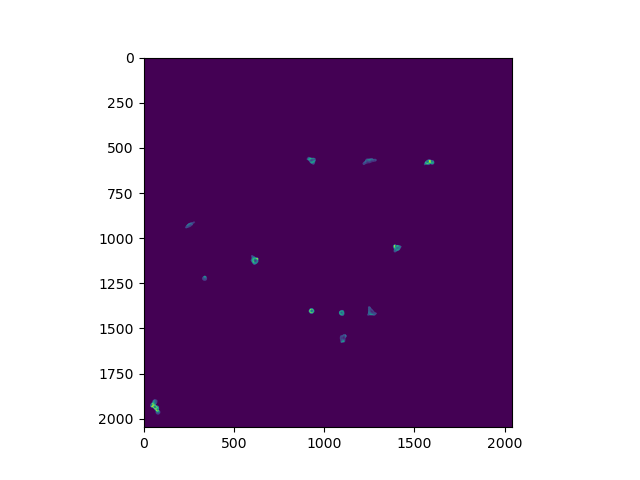

In [102]:
plt.subplots()
plt.imshow(image*(tracker.mask>0))